In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math

def generateSamplesfromGuassian(mu, sigma, n):
    return np.random.normal(mu, sigma, n)

class GuassianMLE:
    def __init__(self, name):
        self.name = name
        self.mu = 0
        self.sigma = 0
        
    def fit(self, x):
        self.mu = np.average(x)
        self.sigma = np.std(x)
        print('The '+self.name+"'s distribution has mean: "+str(self.mu))
        print('The '+self.name+"'s distribution has standard deviation: "+str(self.sigma)+'\n')
        
    def likelihoodAt(self, x):
        return stats.norm.pdf(x, self.mu, self.sigma)



In [2]:
n_sample = 1000
x_salmon = generateSamplesfromGuassian(55, 8, n_sample)
x_mackerel = generateSamplesfromGuassian(35, 5, n_sample)

mackerel_distribution = GuassianMLE('Mackerel')
mackerel_distribution.fit(x_mackerel)

salmon_distribution = GuassianMLE('Salmon')
salmon_distribution.fit(x_salmon)


The Mackerel's distribution has mean: 35.01006369722425
The Mackerel's distribution has standard deviation: 4.979244224835793

The Salmon's distribution has mean: 54.877074472664354
The Salmon's distribution has standard deviation: 8.222402094010699



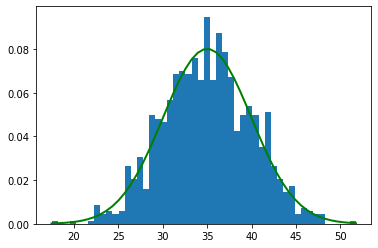

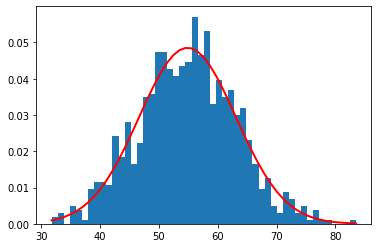

In [3]:
from matplotlib import pyplot as plt

count, bins, ignored = plt.hist(x_mackerel, 50, density=True)
plt.plot(bins, mackerel_distribution.likelihoodAt(bins), linewidth=2, color='g')
plt.show()

count, bins, ignored = plt.hist(x_salmon, 50, density=True)
plt.plot(bins, salmon_distribution.likelihoodAt(bins), linewidth=2, color='r')
plt.show()

In [24]:
x = np.linspace(0, 80, 100)

x_test = 45

plt.plot(x, gaussain_mackarels(x), linewidth=2, color='g', label="Salmon")

plt.plot(x, gaussain_salmons(x), linewidth=2, color='r', label="Salmon")

plt.plot(x_test, gaussain_salmons(x_test), 'go') 
plt.plot(x_test, gaussain_salmons(x), 'ro') 
plt.axvline(x_test, -1, 1, linestyle='--', label="Likelihood of x_test = 45")
plt.legend()
plt.show()

NameError: name 'gaussain_mackarels' is not defined

In [22]:
def generateLabeledSamplesfromGuassian(mu, sigma, n, l):
    x = np.reshape(np.random.normal(mu, sigma, n), (n, 1))
    y = np.full((n, 1), l)
    return np.append(x, y, axis=1)

D_salmon = generateLabeledSamplesfromGuassian(55, 8, 1000, 1)
D_mackerel = generateLabeledSamplesfromGuassian(35, 5, 1000, 2)
D = np.append(D_salmon, D_mackerel, axis=0)
np.random.shuffle(D)
np.savetxt('fish_dataset.csv', D, fmt='%.6f, %d', delimiter=',')